<a href="https://colab.research.google.com/github/Dabii19/CFE-IA-E4/blob/main/CalidadVino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality-red.csv')

print (df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

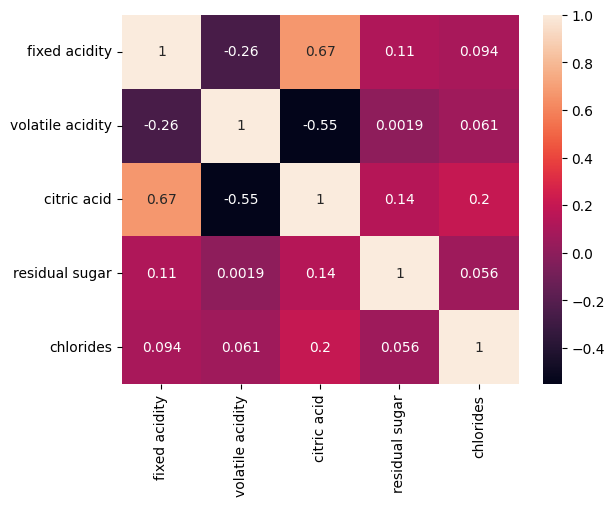

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']

sns.heatmap(df[cols].corr(), annot = True)
plt.show()

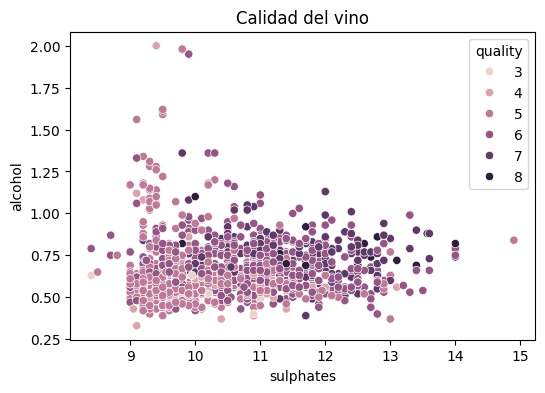

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(6,4))
sb.scatterplot(
    data=df,
    x="alcohol",
    y="sulphates",
    hue="quality")

plt.title("Calidad del vino")
plt.xlabel("sulphates")
plt.ylabel("alcohol")
plt.legend(title="quality")
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df[['alcohol', 'sulphates', 'citric acid']]
#x = df.drop(columns = ['species'])

y = df['quality']

scaler = StandardScaler()

XScaled = scaler.fit_transform(X)

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(XScaled, y)

KNeighborsClassifier(n_neighbors=3)

In [19]:
input = [[7.0, 0.60, 0.12]] #alcohol, sulfato, acido
inputScaler = scaler.transform(input)
output = kn.predict(inputScaler)

print("La calidad del alcohol es:", output[0])

# Todo 0 == 4
# a = 5.0 s = 0.60 ac = 0.19 == 3 con el a y s fijos mientras vario el acido se mantiene en 3 fijo
#a = 6.0 s = 0.60 ac = 0.12 == 5 con el s y el ac fijos mientras vario el alcohol con 6.0 para abajo de alcohol la calidad baja, al llegar a 6 para arriba se mantiene la calidad en 6

La calidad del alcohol es: 6


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
